<a href="https://colab.research.google.com/github/thegeeklife/ML_Assignments/blob/main/BinaryClassifierComparison_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Comparison of Binary Classifier performances with given hyperparameters on MNIST 784 dataset

```
# Subia Ansari
```



In [ ]:
import sklearn
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#set the required figure sizes
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
# Import data from sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
#data is stored as a dictionary so we're gonna check the keys
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist['data'], mnist['target']
print('X shape = ', X.shape, ' Y shape = ', y.shape)

X shape =  (70000, 784)  Y shape =  (70000,)


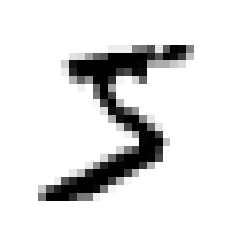

In [ ]:
# 70k images (rows), 784 features(cols)

#plot a datapoint 
digit_1 = X[0]
digit_image = digit_1.reshape(28,28) #each image is 28x28 pixels
plt.imshow(digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis('off')
plt.show()

In [ ]:
# Let's check the target label
y[0]

'5'

In [ ]:
#It's a string so we're going to convert it to int
y = y.astype(np.uint8)

In [ ]:
# Creating a test and train set
# first 60k images - train, last 10k images - test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Creating the required labels

In [ ]:
#convert y test and y train labels to binary (True for 1, False for not 1)
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

# for 6 vs not 6
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

#for 8 vs not 8
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

### Defining one function call to train

In [ ]:
# Defining a function to reduce code clutter
#takes the classifier function as argument along with training set and labels
def train_model(classifier, X_train, y_train):
  clf = make_pipeline(StandardScaler(), classifier)
  clf.fit(X_train, y_train)
  val_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
  test_score = clf.score(X_test, y_test)
  return val_score, test_score

## Classifier for 1 vs. not 1

### SGD Model

In [ ]:
# Assignment requirement for parameters
# random-state = 623, maximum iteration=500, tol=1e-4
print('Binary Classifier for 1 vs not 1')
print('Accuracy for SGD : ')
model, model_score = train_model(SGDClassifier(random_state=623, max_iter = 500, tol = 1e-4), X_train, y_train_1)
#sgd_model_1, score1 = sgd(X_train, y_train_1)
print('Cross validation: ', model, ' Test set : ', model_score)


Binary Classifier for 1 vs not 1
Accuracy for SGD : 
Cross validation:  [0.99035 0.99075 0.99125]  Test set :  0.2065


* Execution time - 40 seconds.

### Logistic Regression

In [ ]:
#We're going to now check for Logistic Regression
print('Accuracy for LogisticRegression')
model, model_score = train_model(LogisticRegression(random_state = 623, max_iter = 500, tol = 1e-4), X_train, y_train_1)
print('Cross validation: ', model, ' Test set : ', model_score)

Accuracy for LogisticRegression
Cross validation:  [0.98975 0.9914  0.99055]  Test set :  0.2085


* Execution time - 1min 20s

### Linear SVC

In [ ]:
# We're going to LinearSVC
print('Accuracy for Linear SVC')
model, model_score = train_model(LinearSVC(random_state = 623, tol = 1e-4), X_train, y_train_1)
print('Cross validation: ', model, ' Test set : ', model_score)

Accuracy for Linear SVC


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross validation:  [0.9866  0.98915 0.9882 ]  Test set :  0.2088


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


* Execution time - 1m

## Classifier for 6 vs not 6

### SGD Model

In [ ]:
print('Binary Classifier for 6 vs not 6')
print('Accuracy for SGD : ')
model, model_score = train_model(SGDClassifier(random_state=623, max_iter = 500, tol = 1e-4), X_train, y_train_6)
print('Cross validation: ', model, ' Test set : ', model_score)

Binary Classifier for 6 vs not 6
Accuracy for SGD : 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Cross validation:  [0.9839  0.98395 0.98485]  Test set :  0.0972


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


* Execution time - 40s

### Logistic Regression

In [ ]:
#We're going to now check for Logistic Regression
print('Accuracy for LogisticRegression')
model, model_score = train_model(LogisticRegression(random_state = 623, max_iter = 500, tol = 1e-4), X_train, y_train_6)
print('Cross validation: ', model, ' Test set : ', model_score)

Accuracy for LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation:  [0.9858  0.98325 0.9857 ]  Test set :  0.0966


Since this also reached convergence at 500 iterations, I'm going to increase the number of iterations

* Execution time - 1m 40s

In [ ]:
#We're going to now check for Logistic Regression
print('Accuracy for LogisticRegression')
model, model_score = train_model(LogisticRegression(random_state = 623, max_iter = 2000, tol = 1e-4), X_train, y_train_6)
print('Cross validation: ', model, ' Test set : ', model_score)

Accuracy for LogisticRegression
Cross validation:  [0.9858  0.98325 0.9857 ]  Test set :  0.0966


* Execution Time 1m 40s

### Linear SVC

In [ ]:
# We're going to LinearSVC
print('Accuracy for Linear SVC')
model, model_score = train_model(LinearSVC(random_state = 623, max_iter = 500, tol = 1e-4), X_train, y_train_6)
print('Cross validation: ', model, ' Test set : ', model_score)

Accuracy for Linear SVC


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross validation:  [0.9821  0.98015 0.98225]  Test set :  0.0974


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


* Execution time - 1min

In [ ]:
# We're going to LinearSVC
print('Accuracy for Linear SVC')
model, model_score = train_model(LinearSVC(random_state = 623, max_iter = 2000, tol = 1e-4), X_train, y_train_6)
print('Cross validation: ', model, ' Test set : ', model_score)

Accuracy for Linear SVC


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross validation:  [0.98485 0.98235 0.98425]  Test set :  0.0968


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


* Execution time - 3m

## Classification for 8 vs not 8

### SGD Model

In [ ]:
print('Binary Classifier for 8 vs not 8')

print('Accuracy for SGD : ')
model, model_score = train_model(SGDClassifier(random_state=623, max_iter = 500, tol = 1e-4), X_train, y_train_8)
print('Cross validation: ', model, ' Test set : ', model_score)

Binary Classifier for 8 vs not 8
Accuracy for SGD : 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Cross validation:  [0.95265 0.95455 0.957  ]  Test set :  0.1024


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


* Execution time - 2m 5s

### Logistic Regression

In [ ]:
#We're going to now check for Logistic Regression
print('Accuracy for LogisticRegression')
model, model_score = train_model(LogisticRegression(random_state = 623, max_iter = 500, tol = 1e-4), X_train, y_train_8)
print('Cross validation: ', model, ' Test set : ', model_score)


Accuracy for LogisticRegression
Cross validation:  [0.957   0.95505 0.95985]  Test set :  0.0991


* Execution time - 1m 35s

### Linear SVC

In [ ]:
# We're going to LinearSVC
print('Accuracy for Linear SVC')
model, model_score = train_model(LinearSVC(random_state = 623, tol = 1e-4), X_train, y_train_8)
print('Cross validation: ', model, ' Test set : ', model_score)

Accuracy for Linear SVC


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross validation:  [0.95395 0.95055 0.95725]  Test set :  0.0991


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


* Execution time - 4m 4s